# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

*Fill in your overview here*
- Write a clear summary of what you did
- Briefly describe the results of your project
- Limit overview to 3-4 sentences

# Names

- Brandon Born
- Katherine Kim
- Karthik Guruvayurappan
- Evan Chen

<a id='research_question'></a>
# Research Question

What is the relationship between government policies and agreements and reduced global carbon emissions of countries from 1970 to 2018?

<a id='background'></a>

## Background & Prior Work

Climate change remains as a persisting, increasingly prevalent issue with the global temperature rising about 2.2 degrees Fahrenheit since the 1800s, ocean temperatures rising about 0.6 degrees Fahrenheit, sea level rise, shrinking ice caps which all have dramatic implications for our future (1). As a result, several climate policies across the globe have been introduced in order to mitigate and adapt to the effects of climate change (2). They take many forms, targeting a variety of different sectors, but with the immense contribution of emissions by human activity, it becomes a question of whether these policies are having tangible effects. 


Eskander and Fankhauser (2020) studied the impact of current cliamte policies on greenhouse gas emissions by looking at climate change legistlation in 133 countries over 18 years from 1999-2016 (3). They identified the statistical average effect of a new climate law on national emissions over the subsequent next 3 years (short-term) and after those 3 years (longer term) to build a "counterfactual time series of greenhouse gas emissions" with the "impact of climate change legistlation switched off" (3). As a result, Eskander and Fankhauser (2020) were able to derive carbon savings of about 38 GtCO2 or gigatonnes of carbon dioxide (3). While they claim this may look "modest," it has offset the carbon space we have left to cap global warming at 1.5 degrees Celcius (2). This means that there is a remaining carbon budget of about 420-770 GtCO2 (versus 382-732 GtCO2 without climate policy) suggesting that global response to climate change is not as limited as people think it is (3). 


Mulvaney with National Geographic analyzed the biggest emittors of emissions after their 2015 Paris Agreement where agreements were made to limit the increase of the global temperature average below 2 degrees Celcius (4). In 2017, there was still a 1.7% increase and 2.7% increase in 2018 (4). Mulvaney split countries based on their emission goals to limit warming to 1.5 degrees Celcius and seeing their current yearly emissions fit within that framework (4). Gambia, Morocco, and India remain "top of their class" whereas the US, Russia, and Saudia Arabia are categorized as "barely trying" with emissions far greater than the 1.5 mark (4). While these observations are only in reference to the Paris Agreements without consideration for smaller climate change legislations, they are highly indicative of, in general, countries having no change or an increase in carbon emissions despite legislation. 


References (include links):
- 1) https://climate.nasa.gov/evidence/
- 2) https://www.rff.org/publications/explainers/federal-climate-policy-101/
- 3) https://www.lse.ac.uk/granthaminstitute/news/the-impact-of-current-climate-policies-on-greenhouse-gas-emissions/#:~:text=The%20global%20response%20to%20climate,around%2038%20gigatonnes%20(Gt).
- 4) https://www.nationalgeographic.com/environment/article/climate-change-report-card-co2-emissions

# Hypothesis


*Fill in your hypotheses here*

# Datasets


- Dataset Name: EDGAR CO2 Emissions 1970-2018 Data
- Link to the dataset: https://github.com/openclimatedata/edgar-co2-emissions
- Number of observations: 50764
- This dataset includes observations from 1970 to 2018 of CO2 emissions by country and sector including building, power industry, transport, and other industrial combustion. 


- Dataset Name: Climate Policy Dataset 
- Link to the dataset: https://climatepolicydatabase.org/policies
- Number of observations: 5120
- This dataset contains observations of all climate policies by country, sector, its current status, decision year from as early as 1927, and policy type (e.g. Agricultural, energy service demand, energy efficiency). 


We are interested in looking at carbon emissions over time and seeing if there is a substantial change once a climate policy is implemented. Therefore, the EDGAR CO2 emissions data set offers us a continual set of data to see trends of emissions, and the Climate Policy Dataset can be combined to denote when policies were implemented and if carbon emissions decreased as a result. We can join the policy dataset with the carbon emissions data by year and country code, and then analyze the change in carbon emissions over time using these datasets. 

# Setup

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Data Cleaning

Both the Edgar CO2 Emissions Dataset and Climate Policy Dataset are contained in a CSV file which means the data for both is in a semi-structured format. The data itself is already tidy. Each variable we are measuring is in a single column while every observation of a variable is in a different row resulting in rectangular data. All that is left is to clean the data. 

Our data cleaning steps include: 
- identifying any null values and dropping (if applicable) 
- checking the data for duplicate entries
- changing column names (if applicable)
- standardizing the responses (if applicable). 

### Climate Policy Dataset

In [2]:
# read in Climate Policy Dataset
climate_policy_data = pd.read_csv('./data/climate_policy_database_policies_export.csv')
climate_policy_data.head()

,Policy ID,Country ISO,Policy name,Policy Title,Jurisdiction,Supranational region,Country,Subnational region or state,City or local,Type of policy instrument,...,Start date of implementation,End date of implementation,High impact,Policy objective,Source or references,Impact indicators: comments,Impact indicators: name,Impact indicators: value,Impact indicators: base year,Impact indicators: target year
0,5244.0,USA,Nationally Determined Contribution – NDC Unite...,Nationally Determined Contribution - NDC,Country,NaN,United States of America,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,Mitigation,https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
1,5243.0,BIH,Nationally Determined Contribution – NDC Bosni...,Nationally Determined Contribution - NDC,Country,NaN,Bosnia and Herzegovina,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2020.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
2,5242.0,MKD,Nationally Determined Contribution – NDC Maced...,Nationally Determined Contribution - NDC,Country,NaN,"Macedonia, the former Yugoslav Republic of",NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
3,5241.0,PHL,Nationally Determined Contribution – NDC Phili...,Nationally Determined Contribution - NDC,Country,NaN,Philippines,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
4,5240.0,CPV,Nationally Determined Contribution – NDC Cape ...,Nationally Determined Contribution - NDC,Country,NaN,Cape Verde,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN


In [3]:
# list columns from dataset
climate_policy_data.columns

Index(['Policy ID', 'Country ISO', 'Policy name', 'Policy Title',
       'Jurisdiction', 'Supranational region', 'Country',
       'Subnational region or state', 'City or local',
       'Type of policy instrument', 'Sector name', 'Policy description',
       'Policy type', 'Policy stringency', 'Implementation state',
       'Date of decision', 'Start date of implementation',
       'End date of implementation', 'High impact', 'Policy objective',
       'Source or references', 'Impact indicators: comments',
       'Impact indicators: name', 'Impact indicators: value',
       'Impact indicators: base year', 'Impact indicators: target year'],
      dtype='object')

In [4]:
# select necessary columns from the dataset
climate_policy_data = climate_policy_data[['Country ISO', 'Policy name', 'Policy Title', 'Country', 
                                           'Sector name', 'Policy type', 'Date of decision', 
                                           'Policy objective']]

In [5]:
# analyze nans from dataset
climate_policy_data.isna().sum()

Country ISO           0
Policy name           0
Policy Title          0
Country               0
Sector name         421
Policy type         496
Date of decision    132
Policy objective     60
dtype: int64

In [6]:
# drop nan values for necesary columns for analysis
(climate_policy_data['Date of decision'].isna()).sum()

132

In [7]:
climate_policy_data = climate_policy_data.dropna(axis=0, subset=['Date of decision'])
climate_policy_data.head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
0,USA,Nationally Determined Contribution – NDC Unite...,Nationally Determined Contribution - NDC,United States of America,General,"Energy efficiency, Energy service demand reduc...",2021.0,Mitigation
1,BIH,Nationally Determined Contribution – NDC Bosni...,Nationally Determined Contribution - NDC,Bosnia and Herzegovina,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
2,MKD,Nationally Determined Contribution – NDC Maced...,Nationally Determined Contribution - NDC,"Macedonia, the former Yugoslav Republic of",General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
3,PHL,Nationally Determined Contribution – NDC Phili...,Nationally Determined Contribution - NDC,Philippines,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
4,CPV,Nationally Determined Contribution – NDC Cape ...,Nationally Determined Contribution - NDC,Cape Verde,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"


In [8]:
# get unique countries
climate_policy_data['Country ISO'].unique()

array(['USA', 'BIH', 'MKD', 'PHL', 'CPV', 'VUT', 'BRA', 'VNM', 'UKR',
       'THA', 'ZAF', 'RUS', 'MAR', 'MEX', 'JPN', 'IDN', 'EUE', 'ETH',
       'COL', 'CHN', 'CAN', 'AUS', 'ARG', 'PYF', 'AND', 'MCO', 'GBR',
       'NOR', 'CHE', 'MDA', 'NZL', 'FJI', 'MHL', 'TON', 'PNG', 'BRN',
       'KOR', 'KHM', 'SGP', 'MNG', 'KGZ', 'PRK', 'ECU', 'SYR', 'BGD',
       'NPL', 'MDV', 'AGO', 'LBN', 'ARE', 'SSD', 'KEN', 'RWA', 'ZMB',
       'GRD', 'ISL', 'CHL', 'PER', 'SEN', 'SUR', 'CRI', 'PAN', 'NIC',
       'JAM', 'DOM', 'CMR', 'GRC', 'SWE', 'IND', 'FRA', 'ESP', 'ITA',
       'SAU', 'SDN', 'DNK', 'BEL', 'DEU', 'LKA', 'BGR', 'TUR', 'UZB',
       'SLB', 'NLD', 'TGO', 'LUX', 'COD', 'FIN', 'TUN', 'SVK', 'GMB',
       'MNE', 'URY', 'TLS', 'TZA', 'IRQ', 'ISR', 'PRY', 'NGA', 'BEN',
       'AFG', 'ERI', 'NRU', 'NAM', 'MOZ', 'FSM', 'ZWE', 'STP', 'GAB',
       'GHA', 'GEO', 'GUY', 'GTM', 'GNB', 'GNQ', 'GIN', 'HTI', 'COK',
       'CIV', 'NER', 'MUS', 'MRT', 'NIU', 'MLI', 'MYS', 'MWI', 'MDG',
       'LIE', 'LBR',

In [9]:
# ensure there is a one to one mapping between Country ISO and Country
print(climate_policy_data['Country ISO'].nunique())
print(climate_policy_data['Country'].nunique())

194
194


In [10]:
# analyze sector name data
climate_policy_data['Sector name'].value_counts()

General                                                           979
Electricity and heat, Renewables                                  693
Electricity and heat                                              288
Transport                                                         243
Buildings                                                         206
                                                                 ... 
Buildings, Appliances, Electricity and heat, Renewables             1
Electricity and heat, Oil, Renewables, General, Transport           1
Transport, Light-duty vehicles, Heavy-duty vehicles, Air, Rail      1
Electricity and heat, Oil, Coal                                     1
Transport, Heavy-duty vehicles, Rail, Shipping                      1
Name: Sector name, Length: 417, dtype: int64

In [11]:
# check data types
climate_policy_data.dtypes

Country ISO          object
Policy name          object
Policy Title         object
Country              object
Sector name          object
Policy type          object
Date of decision    float64
Policy objective     object
dtype: object

In [12]:
# check data shape
climate_policy_data.shape

(4988, 8)

In [13]:
# drop duplicates
climate_policy_data = climate_policy_data.drop_duplicates()

In [14]:
# check data shape
climate_policy_data.shape

(4754, 8)

### Edgar CO2 Dataset

The following is the code used to clean and briefly explore the Edgar CO2 dataset. 

In [15]:
#Reads in dataset from where it was saved in datahub
#For the Edgar CO2 emissions dataset
df = pd.read_csv('https://raw.githubusercontent.com/openclimatedata/edgar-co2-emissions/master/data/edgar-co2-emissions.csv')
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


In [16]:
# Check for null values, only null values appear in emissions column
df.isna().any()

Code         False
Name         False
Sector       False
Year         False
Emissions     True
dtype: bool

In [17]:
# number of null/missing values in Emissions column
df['Emissions'].isnull().sum()

387

In [18]:
#Seeing the total emissions by country in order to see if the null values affect calculations, which they don’t so we will keep the null values in the dataset
df.groupby('Name').agg('sum').sort_values(by='Emissions', ascending=False)['Emissions']

Name
United States                                   256355.650474
China                                           215491.859571
Russia                                           85982.870481
Japan                                            55297.538635
Germany                                          46955.011838
                                                    ...      
Kiribati                                             1.309827
Falkland Islands                                     0.743025
Anguilla                                             0.583611
Saint Helena, Ascension and Tristan da Cunha         0.336218
Faroes                                               0.074013
Name: Emissions, Length: 210, dtype: float64

In [19]:
# No duplicate rows
df.duplicated().any()

False

In [20]:
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


<AxesSubplot:ylabel='Frequency'>

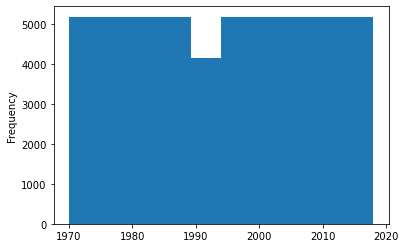

In [21]:
# check distribution of years
df['Year'].plot(kind='hist')

In [22]:
# check distribution of countries
df['Code'].unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB',
       'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM',
       'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI',
       'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ',
       'ETH', 'FLK', 'FJI', 'FIN', 'FRA_MCO', 'GUF', 'PYF', 'GAB', 'GEO',
       'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GTM', 'GIN',
       'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'ISR_PSE', 'ITA_SMR_VAT', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR',
       'MOZ

<AxesSubplot:>

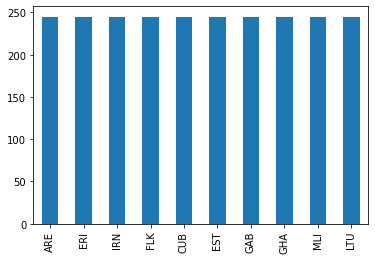

In [23]:
df['Code'].value_counts().nlargest(10).plot(kind='bar')

In [24]:
# ensure one to one mapping between country names and codes
print(df['Name'].nunique())
print(df['Code'].nunique())

210
210


In [25]:
# check sector value counts
df['Sector'].value_counts()

Transport                      10241
Other sectors                  10192
Power Industry                 10143
Buildings                      10094
Other industrial combustion    10094
Name: Sector, dtype: int64

# Data Analysis & Results

## EDA

### Climate Policy Dataset

**Structure**: This dataset is a single table stored in a csv format (tabular, semi-structured data), and has 4754 unique observations with 8 variables (columns).

In [26]:
# view the shape of the climate data
climate_policy_data.shape

(4754, 8)

**Granularity**: Each observation in this dataframe represents a climate policy passed by a national government.

In [27]:
# preview dataframe to understand the granularity
climate_policy_data.head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
0,USA,Nationally Determined Contribution – NDC Unite...,Nationally Determined Contribution - NDC,United States of America,General,"Energy efficiency, Energy service demand reduc...",2021.0,Mitigation
1,BIH,Nationally Determined Contribution – NDC Bosni...,Nationally Determined Contribution - NDC,Bosnia and Herzegovina,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
2,MKD,Nationally Determined Contribution – NDC Maced...,Nationally Determined Contribution - NDC,"Macedonia, the former Yugoslav Republic of",General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
3,PHL,Nationally Determined Contribution – NDC Phili...,Nationally Determined Contribution - NDC,Philippines,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
4,CPV,Nationally Determined Contribution – NDC Cape ...,Nationally Determined Contribution - NDC,Cape Verde,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"


**Scope**: Overall, the data is mostly complete, but has some missingness in the sector name, policy type, and policy objective columns. It seems that missingness occurs more in more general policies and is related to the other columns with missingness, but there is also some randomness in the missingness. The only quantitative variable is the date of decision, which based on descriptive statistics and a histogram, appears to have a left-skewed distribution. There are 98 outlier years, but these outliers should remain in the dataset since they are only outliers due to an increasing amount of recent climate policies. A barplot of the 20 countries with the most climate policies passed reveals that the United States passes the most climate policies, with roughly 425 policies passed. 

**Temporality**: The left-skewed distribution of decision dates indicates more policies in recent years. This is likely due to increasing awareness surrounding climate change in recent years. The data are presented on a year level, beginning around 1930 and ranging all the way into the present (2021).

In [28]:
# summarize data missingness
climate_policy_data.isna().sum()

Country ISO           0
Policy name           0
Policy Title          0
Country               0
Sector name         391
Policy type         461
Date of decision      0
Policy objective     59
dtype: int64

In [29]:
# analyze sector name missingness
climate_policy_data[climate_policy_data['Sector name'].isna()].head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
100,CMR,Creation of the Steering Committee for activit...,Creation of the Steering Committee for activit...,Cameroon,NaN,NaN,2012.0,Mitigation
101,GRC,Compensation to carbon intensive industries (s...,Compensation to carbon intensive industries (s...,Greece,NaN,NaN,2014.0,Mitigation
429,ESP,Resolution of 10 April 2017 of the State Secre...,Resolution of the State Secretary of Energy,Spain,NaN,Renewables,2017.0,Mitigation
626,UZB,Resolution on Further Development of Renewable...,Resolution on Further Development of Renewable...,Uzbekistan,NaN,Renewables,2016.0,Mitigation
813,ESP,FNEE: Aid Programme for Desalination Plants Sp...,FNEE: Aid Programme for Desalination Plants,Spain,NaN,Energy efficiency,2015.0,Mitigation


In [30]:
# analyze policy type missingness
climate_policy_data[climate_policy_data['Policy type'].isna()].head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
100,CMR,Creation of the Steering Committee for activit...,Creation of the Steering Committee for activit...,Cameroon,NaN,NaN,2012.0,Mitigation
101,GRC,Compensation to carbon intensive industries (s...,Compensation to carbon intensive industries (s...,Greece,NaN,NaN,2014.0,Mitigation
131,CRI,Intersectoral agreement to reduce emissions in...,Intersectoral agreement to reduce emissions in...,Costa Rica,Transport,NaN,2019.0,"Mitigation, Energy access"
152,DNK,Climate Act Denmark (2019),Climate Act,Denmark,General,NaN,2019.0,Mitigation
167,SWE,Ordinance (2019:525) on State Aid for the Inst...,Ordinance (2019:525) on State Aid for the Inst...,Sweden,"Transport, Low-emissions mobility",NaN,2019.0,Mitigation


In [31]:
# analyze policy objective missingness
climate_policy_data[climate_policy_data['Policy objective'].isna()].head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
18,ZAF,Biofuels Regulatory Framework (BRF) to impleme...,Biofuels Regulatory Framework (BRF) to impleme...,South Africa,Transport,Renewables,2020.0,NaN
35,COL,Non-conventional renewable energy auction Colo...,Non-conventional renewable energy auction,Colombia,"Electricity and heat, Renewables",Renewables,2019.0,NaN
130,ARG,Grid expansion tenders Argentina (2019),Grid expansion tenders,Argentina,Electricity and heat,Renewables,2019.0,NaN
138,USA,Affordable Clean Energy (ACE) United States of...,Affordable Clean Energy (ACE),United States of America,"Electricity and heat, Coal",Energy efficiency,2019.0,NaN
198,CAN,Amendment 14 - Energy Efficiency Regulations -...,Amendment 14 - Energy Efficiency Regulations -...,Canada,"Buildings, Appliances",Energy efficiency,2019.0,NaN


In [32]:
# preview descriptive statistics (for date of decision only)
climate_policy_data.describe()

,Date of decision
count,4754.000000
mean,2007.921750
std,8.143114
min,1927.000000
25%,2004.000000
50%,2009.000000
75%,2014.000000
max,2021.000000


In [33]:
# count outliers in year
iqr = 2014-2004
lower_bound = 2004 - 1.5 * iqr 
upper_bound = 2014 + 1.5 * iqr
((climate_policy_data['Date of decision'] > upper_bound) | (climate_policy_data['Date of decision'] < lower_bound)).sum()

98

Text(0.5, 1.0, 'Distribution for when Climate Policy Implementation Year')

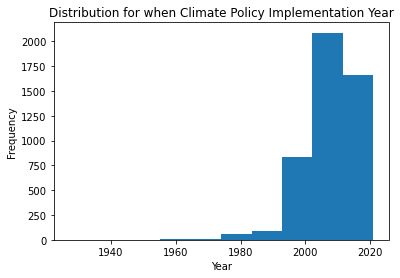

In [34]:
# generate plot of years to analyze values
ax = climate_policy_data['Date of decision'].plot(kind='hist');
ax.set_xlabel("Year")
ax.set_title("Distribution for when Climate Policy Implementation Year")

The distribution of years is left-skewed, with more policies in more recent years, likely reflective of increasing awareness of climate change.

Text(0.5, 1.0, 'Number of Policies (20 Highest Frequencies)')

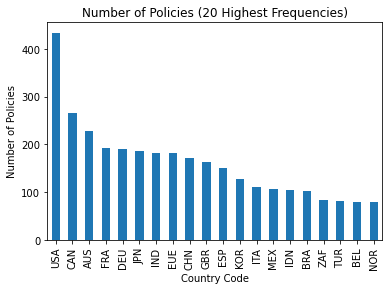

In [35]:
# generate plot of top countries to analyze values
ax = climate_policy_data['Country ISO'].value_counts().nlargest(20).plot(kind='bar');
ax.set_xlabel("Country Code")
ax.set_ylabel("Number of Policies")
ax.set_title("Number of Policies (20 Highest Frequencies)")

The United States has the most climate policies passed, just over 400 policies. The 20 countries with the most policies all have roughly 100 policies or more.

Text(0.5, 1.0, 'Climate Policy Type Frequency')

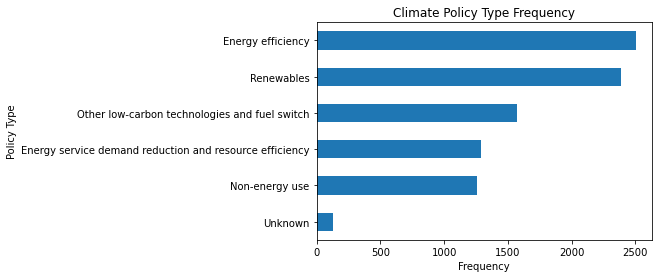

In [36]:
# plot distribution of policy types
ax = pd.Series(climate_policy_data['Policy type'].str.split(', ').dropna()
          .sum()).value_counts(ascending=True).plot(kind='barh');
ax.set_xlabel("Frequency")
ax.set_ylabel("Policy Type")
ax.set_title("Climate Policy Type Frequency")

The two most common types of policy types are energy efficiency and renewables.

Text(0.5, 1.0, 'Frequency of Policy Objectives')

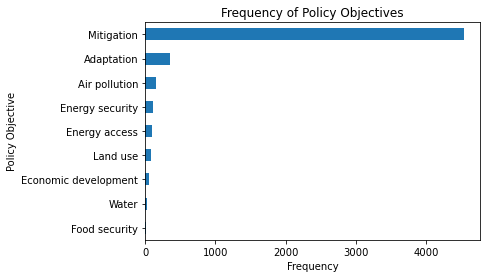

In [37]:
# plot distribution of policy objective
ax = pd.Series(climate_policy_data['Policy objective'].str.split(', ').dropna()
          .sum()).value_counts(ascending=True).plot(kind='barh');
ax.set_xlabel("Frequency")
ax.set_ylabel("Policy Objective")
ax.set_title("Frequency of Policy Objectives")

The most common policy objective is mitigation by far.

Text(0.5, 1.0, 'Sector Name Frequency')

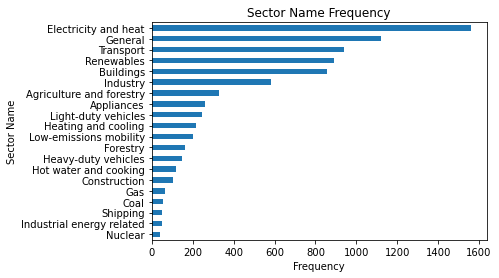

In [38]:
# plot distribution of sectors
ax = pd.Series(climate_policy_data['Sector name'].str.split(', ').dropna()
          .sum()).value_counts(ascending=True).nlargest(20).sort_values(ascending=True).plot(kind='barh');
ax.set_xlabel("Frequency")
ax.set_ylabel("Sector Name")
ax.set_title("Sector Name Frequency")

The five most common sectors are electricity and heat, general, transport, renewables, and buildings.

**Faithfulness**: This dataset is collected, updated, and maintained by the NewClimateInstitute and keeps track of all mitigation policies passed towards climate change. This is a reliable data source. However, since the data is only updated periodically, the specific CSV file used in this analysis might be a little bit out of date. 

### Edgar CO2 Dataset

In [39]:
df.columns

Index(['Code', 'Name', 'Sector', 'Year', 'Emissions'], dtype='object')

**Structure of the Edgar CO2 emissions dataset:** tabular data with individual observations in rows and variables in columns


Therefore, we do not necessarily need to change the way the data is stored. 

In [40]:
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


**Granularity of Edgar CO2 emissions dataset:** group-level over time 

In [41]:
print('(rows, columns):',(df.shape))
print('Number of countries in dataset:',(df['Code'].nunique()))

(rows, columns): (50764, 5)
Number of countries in dataset: 210


**Scope of Edgar CO2 emissions dataset:** According to Google and the ISO Country Code standards, there are 249 countries in the world with 194 of them being independent. Therefore, our data has a relatively large scope. Although we cannot definitively say that we can understand all CO2 emissions from every country using this data, the scope of our question is still relevant. 

In [42]:
print('Number of years:',(df['Year'].nunique()))
print('Start year:',(df['Year'][0]))
print('End year:',(df['Year'][len(df)-1]))

Number of years: 49
Start year: 1970
End year: 2018


**Temporality of Edgar CO2 emissions dataset:** We have data about CO2 emissions from 1970 to 2018 about 210 countries. 

**Faithfulness of Edgar CO2 emissions dataset:** Our data comes from EDGAR, the Emissions Database for Global Atmospheric Research. According to EDGAR's website, they provide independent emission data estimates regardless of what individual countries reported or by the UNFCCC, the United Nationals Framework Convention on Climate Change, using a consistent methodology. We can say that our data is accurate as each observation is not self-reported and is collected in a systematic fashion. 

In [43]:
# Checking if there is 49 observations for each country from each sector 
# grouping sectors to see if each has 49 observations 

all(df.groupby('Code').Sector.value_counts().eq(49))

True

We now will explore countries with the highest and lowest emissions.

In [44]:
#creating a dataframe of the countries with the highest emissions from 1970-2018 
#also creating a separate dataframe of countries with the very low emissions 
df_highest = df[df['Emissions'] >= 500]
df_lowest = df[df['Emissions'] <= 1]
df_highest, df_lowest

(      Code                    Name                       Sector  Year  \
 152    RUS                  Russia               Power Industry  1970   
 197    USA           United States               Power Industry  1970   
 403    USA           United States                    Buildings  1970   
 610    USA           United States                    Transport  1970   
 816    USA           United States  Other industrial combustion  1970   
 ...    ...                     ...                          ...   ...   
 50435  IND                   India  Other industrial combustion  2018   
 50544  USA           United States  Other industrial combustion  2018   
 50593  CHN                   China                Other sectors  2018   
 50762  AIR  International Aviation                    Transport  2018   
 50763  SEA  International Shipping                    Transport  2018   
 
          Emissions  
 152     508.338492  
 197    1079.968842  
 403     883.543122  
 610    1039.772133  


**Scope of lowest emissions dataframe:** This dataframe contains 25,436 instances of countries with emission levels of 1 or below in a given year, which is a substantially larger portion of the original dataset.

This can also be noted through using the describe method on the dataframe as the average emissions is very low at 24.5 Mt, while the max is around 4585 Mt.

In [45]:
df.describe()

,Year,Emissions
count,50764.000000,5.037700e+04
mean,1994.000000,2.448694e+01
std,14.142275,1.352670e+02
min,1970.000000,1.931770e-07
25%,1982.000000,8.864667e-02
50%,1994.000000,9.520414e-01
75%,2006.000000,8.277985e+00
max,2018.000000,4.585523e+03


**Visualizing highest emissions data**

<Figure size 1440x1440 with 0 Axes>

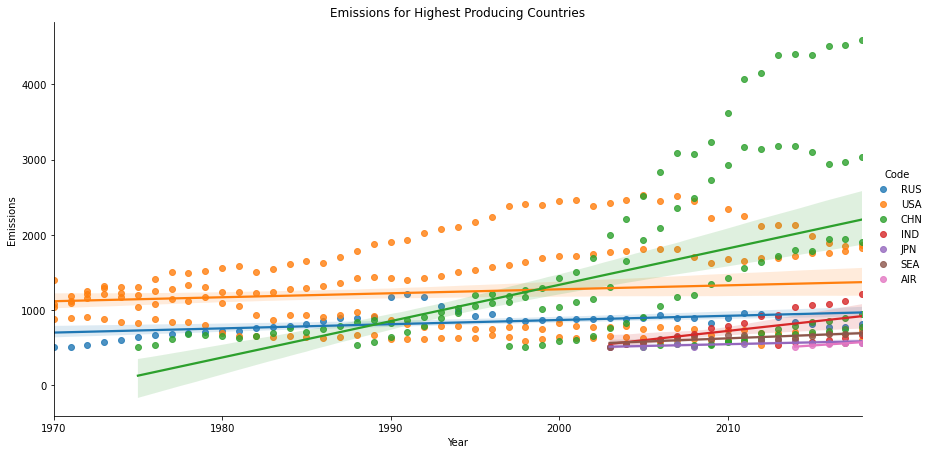

In [46]:
plt.figure(figsize=(20,20))
ax = sns.lmplot(x='Year', y='Emissions',hue='Code',data=df_highest,fit_reg=True, height=6, aspect=2).set(title = "Emissions for Highest Producing Countries")
plt.show()

We can see that the overall trends for the majority of these highest emission countries are positive. In addition, we can see from out lmplot of the highest countries that there is an increase in the number of countries which break this 500 emissions barrier after 2000, perhaps indicating changes in environmental policy among those countries. 

In [47]:
df_highest.Name.unique()

array(['Russia', 'United States', 'China', 'India', 'Japan',
       'International Shipping', 'International Aviation'], dtype=object)

In [48]:
df_lowest.Name.nunique()

156

Our lowest emissions dataframe contains 156 countries which all have emission levels equal to or below 1, which is very low in relation to the highest emission countries, showing a clear discrepancy in global emissions among countries.

**Grouping and Visualizing Better Off or Worse Off Countries**

Let's check which countries are better off or worse in 2018 in comparison to 1970 in terms of emissions.

In [49]:
df

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430
...,...,...,...,...,...
50759,YEM,Yemen,Other sectors,2018,2.576755
50760,ZMB,Zambia,Other sectors,2018,1.765269
50761,ZWE,Zimbabwe,Other sectors,2018,1.300813
50762,AIR,International Aviation,Transport,2018,564.612452


Looking at AFG (Afghanistan) for example, we know that there are 5 sectors for a particular country in one year.

In [50]:
df[(df['Code'] == 'AFG') & (df['Year'] ==  1970)]

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
207,AFG,Afghanistan,Buildings,1970,0.577234
413,AFG,Afghanistan,Transport,1970,0.233767
620,AFG,Afghanistan,Other industrial combustion,1970,0.067090
826,AFG,Afghanistan,Other sectors,1970,0.531106


We can find the total emissions by using the sum method to sum up the 'Emissions' column.
AFG has around 1.466 Mt in 1970.

In [51]:
df[(df['Code'] == 'AFG') & (df['Year'] ==  1970)]['Emissions'].sum()

1.4661586206930002

Let's find all the countries.

In [52]:
countries = df['Code'].unique()
countries

array(['AFG', 'ALB', 'DZA', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB',
       'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM',
       'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI',
       'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ',
       'ETH', 'FLK', 'FJI', 'FIN', 'FRA_MCO', 'GUF', 'PYF', 'GAB', 'GEO',
       'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GTM', 'GIN',
       'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'ISR_PSE', 'ITA_SMR_VAT', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR',
       'MOZ

Let's find which countries are worse off in 2018 in comparison to 1970 by checking total emissions in 1970 against total emissions in 2018.

In [53]:
# define totalIncrease to store countries that are worse off in 2018
totalIncrease = pd.DataFrame(columns=df.columns)

for code in countries:
    if df[(df['Code'] == code) & (df['Year'] ==  1970)]['Emissions'].sum() < df[(df['Code'] == code) & (df['Year'] == 2018)]['Emissions'].sum():
        totalIncrease = totalIncrease.append(df[df['Code'] == code])
        
print(totalIncrease['Code'].unique())
print(totalIncrease['Code'].nunique())

['AFG' 'ALB' 'DZA' 'AGO' 'AIA' 'ATG' 'ARG' 'ABW' 'AUS' 'AUT' 'BHS' 'BHR'
 'BGD' 'BRB' 'BLR' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'VGB'
 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV' 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL'
 'COM' 'COG' 'COK' 'CRI' 'CIV' 'CUB' 'CUW' 'CYP' 'COD' 'DJI' 'DMA' 'DOM'
 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FLK' 'FJI' 'FIN' 'GUF'
 'PYF' 'GAB' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GLP' 'GTM' 'GIN' 'GNB' 'GUY'
 'HTI' 'HND' 'HKG' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR_PSE'
 'ITA_SMR_VAT' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'KWT' 'LAO' 'LBN' 'LSO'
 'LBR' 'LBY' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MTQ' 'MRT' 'MUS'
 'MEX' 'MDA' 'MNG' 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC'
 'NER' 'NGA' 'PRK' 'NOR' 'OMN' 'PAK' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL'
 'PRT' 'PRI' 'QAT' 'REU' 'RUS' 'RWA' 'SHN' 'KNA' 'LCA' 'SPM' 'VCT' 'WSM'
 'STP' 'SAU' 'SEN' 'CSXX' 'SYC' 'SLE' 'SGP' 'SVN' 'SLB' 'SOM' 'ZAF' 'KOR'
 'ESP_AND' 'LKA' 'SDN_SSD' 'SUR' 'SYR' 'TWN' 'TZA' 'THA'

Let's find which countries are better off in 2018 in comparison to 1970 by checking total emissions in 1970 against total emissions in 2018.

In [54]:
# define totalDecrease to store countries that are better off in 2018
totalDecrease = pd.DataFrame(columns=df.columns)

for code in countries:
    if df[(df['Code'] == code) & (df['Year'] ==  1970)]['Emissions'].sum() > df[(df['Code'] == code) & (df['Year'] == 2018)]['Emissions'].sum():
        totalDecrease = totalDecrease.append(df[df['Code'] == code])
        
print(totalDecrease['Code'].unique())
print(totalDecrease['Code'].nunique())

['ARM' 'AZE' 'BEL' 'BRN' 'BGR' 'HRV' 'CZE' 'DNK' 'FRA_MCO' 'GEO' 'DEU'
 'HUN' 'KGZ' 'LVA' 'LTU' 'LUX' 'MKD' 'PLW' 'ROU' 'SVK' 'SWE' 'CHE_LIE'
 'TJK' 'UKR' 'GBR' 'VUT']
26


**It looks like only 26 countries are better off in 2018 in comparison to the 184 countries that are worse off in 2018.**

Plotting and looking at countries that are worse off in 2018, it seems that a few countries have drastic increases while others are more of a steady increase.

<Figure size 1440x1440 with 0 Axes>

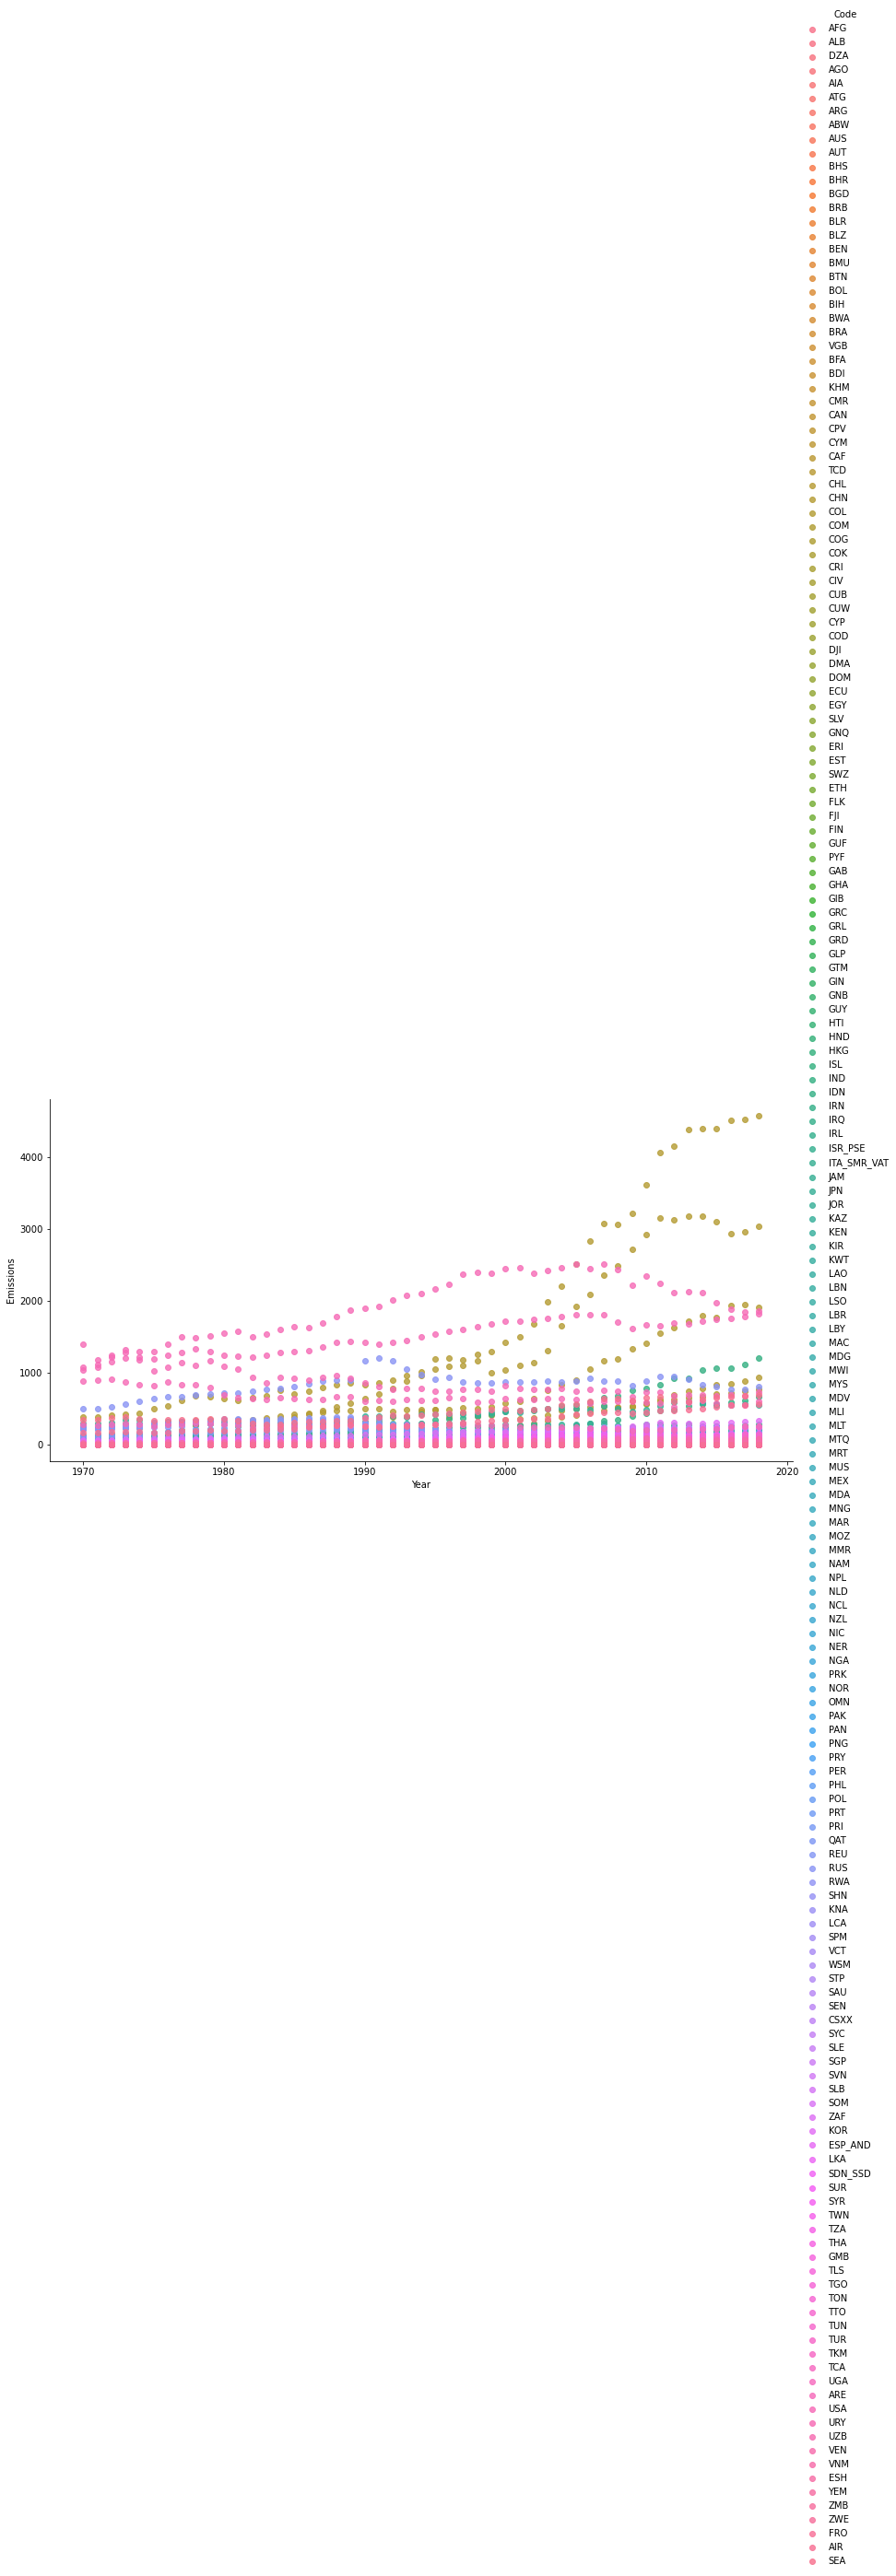

In [55]:
plt.figure(figsize=(20,20))
sns.lmplot(x='Year', y='Emissions',hue='Code',data=totalIncrease,fit_reg=False, height=6, aspect=2);
plt.show()

Plotting and looking at countries that are better off in 2018, again it seems that most countries are in a steady decrease as opposed to a drastic decrease.

<Figure size 1440x1440 with 0 Axes>

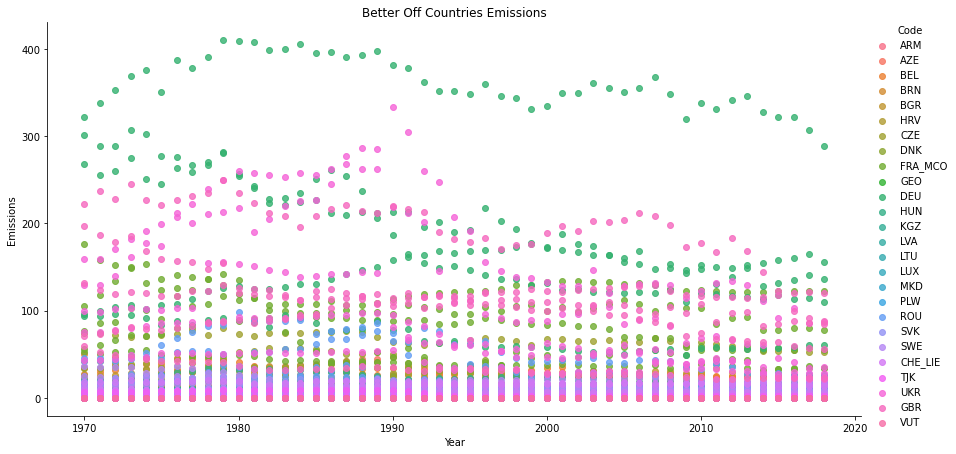

In [56]:
plt.figure(figsize=(20,20))
sns.lmplot(x='Year', y='Emissions',hue='Code',data=totalDecrease,fit_reg=False, height=6, aspect=2).set(title="Better Off Countries Emissions");
plt.show()

We now want to merge the two dataset and analyze how carbon emissions change over time with respect to each country's environmental policies.

Start by grouping the Edgar CO2 dataset by country and year then adding up the total carbon emissions for each 
particular year and country based on all of the sectors.

In [158]:
# changing column names for join
grouped = df.rename(columns = {'Name' : 'Country'}) 
grouped_co2_data = grouped.groupby(['Code', 'Year'])['Emissions'].agg('sum').reset_index()
grouped_co2_data.head()
# grouped_co2_data[grouped_co2_data['Code']=='USA'] -- test

,Code,Year,Emissions
0,ABW,1970,0.021293
1,ABW,1971,0.021306
2,ABW,1972,0.024495
3,ABW,1973,0.026774
4,ABW,1974,0.022339


Group the policy dataset by country and year then counting how many policies have been passed for each 
particular year and country.

In [159]:
# grouping policy dataset

# renaming 'Date of decision' to 'Year' and 'Country ISO' to 'Code' to help with the join
grouped_policy = climate_policy_data.rename(columns = {'Date of decision':'Year'})
grouped_policy = grouped_policy.rename(columns = {'Country ISO':'Code'})

grouped_policy = grouped_policy.groupby(['Code', 'Year']).agg('count').reset_index()
grouped_policy.head(50)

,Code,Year,Policy name,Policy Title,Country,Sector name,Policy type,Policy objective
0,AFG,2015.0,1,1,1,1,1,1
1,AGO,2008.0,2,2,2,2,2,2
2,AGO,2010.0,2,2,2,0,0,2
3,AGO,2012.0,2,2,2,1,1,2
4,AGO,2013.0,1,1,1,0,0,1
5,AGO,2015.0,1,1,1,1,1,1
6,AGO,2020.0,1,1,1,1,1,1
7,ALB,2010.0,1,1,1,1,1,1
8,ALB,2015.0,1,1,1,1,1,1
9,AND,2020.0,1,1,1,1,1,1


Finally, we merge the two grouped datasets with an outer merge based on 'Code' and 'Year'.
We do an outer merge, because we want to merge by matching rows based on 'Code' and 'Year and at the
same time we still want to include unmatched rows that have either emissions or a climate policy but, not both.

In [160]:
merged_data = pd.merge(grouped_policy, grouped_co2_data, how = 'outer', on = ['Code', 'Year'])

# How many policy names is equivalent to the number of policies
merged_data = merged_data.rename(columns = {'Policy name':'Number of Policies'})

merged_data

,Code,Year,Number of Policies,Policy Title,Country,Sector name,Policy type,Policy objective,Emissions
0,AFG,2015.0,1.0,1.0,1.0,1.0,1.0,1.0,9.800058
1,AGO,2008.0,2.0,2.0,2.0,2.0,2.0,2.0,19.672835
2,AGO,2010.0,2.0,2.0,2.0,0.0,0.0,2.0,24.018474
3,AGO,2012.0,2.0,2.0,2.0,1.0,1.0,2.0,25.221763
4,AGO,2013.0,1.0,1.0,1.0,0.0,0.0,1.0,27.426121
...,...,...,...,...,...,...,...,...,...
10572,ZWE,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,7.757873
10573,ZWE,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,12.567990
10574,ZWE,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,11.472800
10575,ZWE,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,12.812133


Drop columns in our merged dataframe:
1. Country is dropped due to Code being used.
2. Policy Title, Sector Name, Policy type, and Policy objective are dropped since, we are only looking at number of policies that year and these columns all originated from the climate policy dataset

In [161]:
# Drop remaining columns
merged_data = merged_data.drop(labels = ['Country', 'Policy Title', 'Sector name', 'Policy type', 'Policy objective'], axis = 1)

merged_data

,Code,Year,Number of Policies,Emissions
0,AFG,2015.0,1.0,9.800058
1,AGO,2008.0,2.0,19.672835
2,AGO,2010.0,2.0,24.018474
3,AGO,2012.0,2.0,25.221763
4,AGO,2013.0,1.0,27.426121
...,...,...,...,...
10572,ZWE,2009.0,NaN,7.757873
10573,ZWE,2014.0,NaN,12.567990
10574,ZWE,2016.0,NaN,11.472800
10575,ZWE,2017.0,NaN,12.812133


Any row with NaN for Number of Policies should be changed to 0. 
It just means that for that country at a certain year there was no climate policies passed but, there still could be emissions.

In [163]:
# Change NaN for Number of Policies to 0
merged_data['Number of Policies'] = merged_data['Number of Policies'].fillna(0)

merged_data

,Code,Year,Number of Policies,Emissions
0,AFG,2015.0,1.0,9.800058
1,AGO,2008.0,2.0,19.672835
2,AGO,2010.0,2.0,24.018474
3,AGO,2012.0,2.0,25.221763
4,AGO,2013.0,1.0,27.426121
...,...,...,...,...
10572,ZWE,2009.0,0.0,7.757873
10573,ZWE,2014.0,0.0,12.567990
10574,ZWE,2016.0,0.0,11.472800
10575,ZWE,2017.0,0.0,12.812133


Any row that contains NaN for Emissions should be dropped.
They need to be dropped since, that means that there is no Emissions data across time for that Code. 
Even if it did have number of policies, we are not able to compare number of policies to emissions.

Also, the amount of countries in this scenario is few in comparison to the entire dataset.

In [165]:
# Check the number of rows that have NaN for emissions in a specific year
merged_data[(merged_data['Emissions'].isnull() == True) & (merged_data['Year'] == 2015)]

,Code,Year,Number of Policies,Emissions
263,CHE,2015.0,1.0,NaN
479,ESP,2015.0,12.0,NaN
519,EUE,2015.0,4.0,NaN
556,FRA,2015.0,8.0,NaN
565,FSM,2015.0,1.0,NaN
729,ISR,2015.0,1.0,NaN
750,ITA,2015.0,1.0,NaN
866,LIE,2015.0,1.0,NaN
896,MCO,2015.0,1.0,NaN
956,MNE,2015.0,1.0,NaN


In [166]:
# Drop rows that contain NaN for Emissions
merged_data = merged_data.dropna(subset=['Emissions'])
merged_data

,Code,Year,Number of Policies,Emissions
0,AFG,2015.0,1.0,9.800058
1,AGO,2008.0,2.0,19.672835
2,AGO,2010.0,2.0,24.018474
3,AGO,2012.0,2.0,25.221763
4,AGO,2013.0,1.0,27.426121
...,...,...,...,...
10572,ZWE,2009.0,0.0,7.757873
10573,ZWE,2014.0,0.0,12.567990
10574,ZWE,2016.0,0.0,11.472800
10575,ZWE,2017.0,0.0,12.812133


The above dataset is the final form of the merged climate policy and emissions dataset. It is clean of NaNs.

## Geospatial Analysis:

In [178]:
temp_merged = merged_data
temp_merged = temp_merged.groupby(['Code'])['Number of Policies'].agg('sum').reset_index()
temp_merged.head()

,Code,Number of Policies
0,ABW,0.0
1,AFG,1.0
2,AGO,8.0
3,AIA,0.0
4,AIR,0.0


In [179]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Statements used to double check the merged dataframes
#print(df[(df['Code'] == 'AFG') & (df['Year'] ==  1970)]['Emissions'].sum())
#df[(df['Code'] ==  'SRB')]['Emissions']
#climate_policy_data[(climate_policy_data['Country ISO'] == 'USA') & (climate_policy_data['Date of decision'] == 2012) ]
#grouped_policy[(grouped_policy['Country'] == 'United States of America')]
#merged_data[(merged_data['Code'] == 'SRB')]
#merged_data[(merged_data['Emissions'].isnull() == True) & (merged_data['Year'] == 2015)]

In [180]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [181]:
world = world.rename(columns={'iso_a3':'Code'})
world

,pop_est,continent,name,Code,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [182]:
geo_data = pd.merge(world, temp_merged, how = 'left', on = ['Code'])
geo_data

,pop_est,continent,name,Code,gdp_md_est,geometry,Number of Policies
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",3.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",15.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",255.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",418.0
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",6.0


In [183]:
world['policies_per_cap'] = geo_data['Number of Policies'] / geo_data['pop_est']
world

,pop_est,continent,name,Code,gdp_md_est,geometry,policies_per_cap
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",3.257548e-06
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2.780304e-07
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.000000e+00
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7.158160e-06
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1.279752e-06
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",4.925267e-06


<AxesSubplot:>

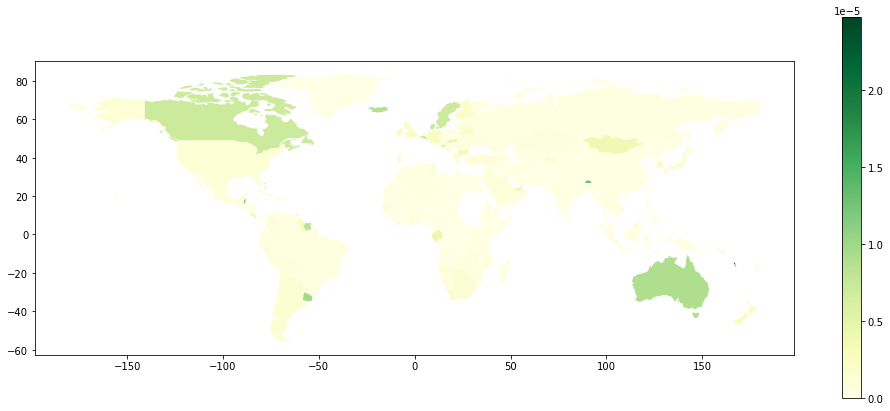

In [184]:
fix, ax = plt.subplots(1,1, figsize=(17,7))

world.plot(column='policies_per_cap', ax=ax, cmap='YlGn', legend=True)

# Ethics & Privacy

**Instructions: Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out Deon's Ethics Checklist. In particular:**

**Are there any biases/privacy/terms of use issues with the data you propsed?
Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
How will you handle issues you identified?**





In order to uphold ethics and privacy, we must ensure that our data does not contain any harmful biases and that our resulting subsequent analysis does not further such harmful biases. While our intentions may not be malicious, we must still be vigilant of any harmful practices that may occur unknowingly throughout our project. Furthermore, we should always consider the risks of using certain data sets. We want to make sure that the data we work with is substantial enough to make reliable inferences. Doing so would result in inaccurate predictions and spurious correlations. If we are not able to find sufficient data, we will need to consider changing our research. 


For our two datasets, there is little indication of any biases. The climate policy dataset is objective in that it lists all climate policies, both opened and closed, from 1970 to 2018. It also includes all country codes indicating that it does not exclude any particular populations. We retrieved the climate policy dataset from the Climate Policy Database which aims to establish an "open and collaborative platform" to gather and retrieve data. Therefore, there seems to be little bias in the type of information we used in our project. 

For the EDGAR CO2 emissions dataset, there is little bias. It provides emission data for every country code and therefore does not exclude any populations. EDGAR provides "idependent" emission information regardless of reports by European Member states of parties under the UNFCCC. Their collection methodology is made transparent and is applied to all countries. 

It is notable that we did only consider the top **X** emission producing countries in our analysis. Our EDA indicated that many countries did not product significant amounts of carbon emissions which in turn affects the number of climate policies implemented throughout the years. 

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*